In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go 
import seaborn as sns
sns.set_theme(style='darkgrid')

data = pd.read_csv('onlinefoods.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


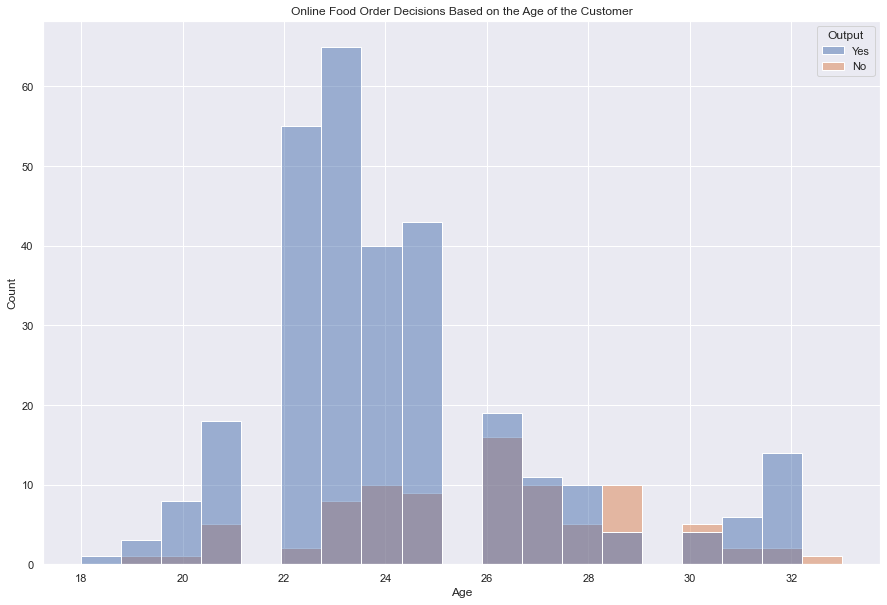

In [3]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.histplot(x="Age", hue="Output", data=data)
plt.show()

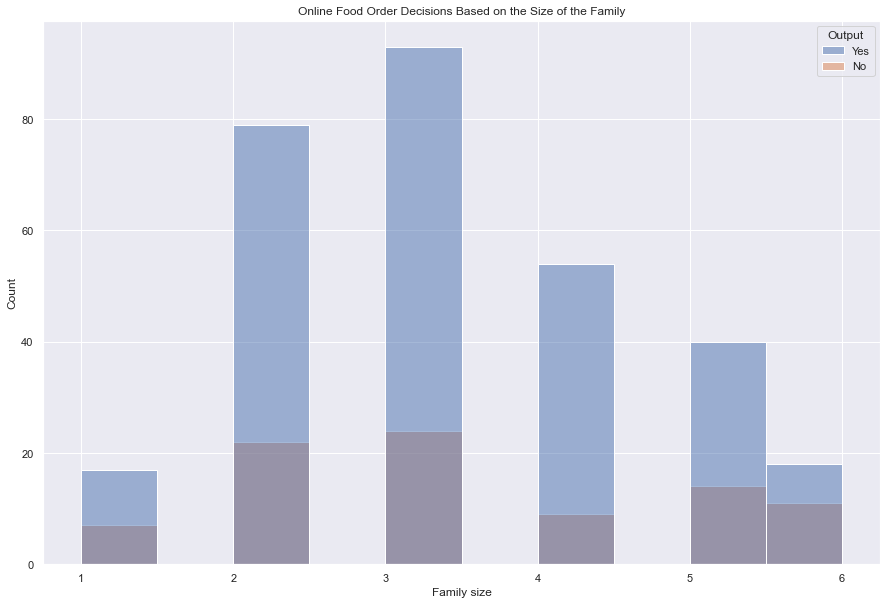

In [4]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.histplot(x="Family size", hue="Output", data=data)
plt.show()

In [5]:
buying_again_data = data.query("Output == 'Yes'")
buying_again_data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [6]:
gender = buying_again_data["Gender"].value_counts()
label = gender.index
counts = gender.values
colors = ['pastel red','pastel blue']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Male Vs. Female')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [7]:
marital = buying_again_data["Marital Status"].value_counts()
label = marital.index
counts = marital.values

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Married Vs. Singles')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [8]:
income = buying_again_data["Monthly Income"].value_counts()
label = income.index
counts = income.values

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Which Income Group Orders Food Online More')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [9]:
data["Gender"] = data["Gender"].replace({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].replace({
    "Married": 2, 
    "Single": 1, 
    "Prefer not to say": 0
})
data["Occupation"] = data["Occupation"].replace({
    "Student": 1, 
    "Employee": 2, 
    "Self Employeed": 3, 
    "House wife": 4
})
data["Educational Qualifications"] = data["Educational Qualifications"].replace({
    "Graduate": 1, 
    "Post Graduate": 2, 
    "Ph.D": 3,
    "School": 4, 
    "Uneducated": 5
})
data["Monthly Income"] = data["Monthly Income"].replace({
    "No Income": 0, 
    "25001 to 50000": 5000, 
    "More than 50000": 7000, 
    "10001 to 25000": 25000, 
    "Below Rs.10000": 10000
})
data["Feedback"] = data["Feedback"].replace({"Positive": 1, "Negative ": 0})
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,Yes,1,Yes
1,24,0,1,1,10000,1,3,12.9770,77.5773,560009,Yes,1,Yes
2,22,1,1,1,10000,2,3,12.9551,77.6593,560017,Yes,0,Yes
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,Yes,1,Yes
4,22,1,1,1,10000,2,4,12.9850,77.5533,560010,Yes,1,Yes


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    int64  
 2   Marital Status              388 non-null    int64  
 3   Occupation                  388 non-null    int64  
 4   Monthly Income              388 non-null    int64  
 5   Educational Qualifications  388 non-null    int64  
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    int64  
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(9), object(2)


In [26]:
### ONLINE FOOD ORDER PREDICTION ###
features = ["Age", "Gender", "Marital Status", "Occupation","Monthly Income", "Educational Qualifications", "Family size", "Feedback"]
X = data[features].values
y = data["Output"].values

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_valid)
print("Succes Rate: {0:.2f} %".format(rf.score(X_valid, y_valid)*100))

Succes Rate: 88.03 %


In [29]:
### FIT ESTIMATION ###
print("Enter Customer Details to Predict If the Customer Will Order Again")
# a = int(input("Enter the Age of the Customer: "))
# b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
# c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
# d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
# e = int(input("Monthly Income: "))
# f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
# g = int(input("Family Size: "))
# i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
a=22
b=1
c=1
d=1
e=0
f=1
g=1
i=0
features = np.array([[a, b, c, d, e, f, g, i]])
print("Finding if the customer will order again: ", rf.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again
Finding if the customer will order again:  ['Yes']
